In [1]:
import codecs
import json
import pandas as pd
from textblob import TextBlob
import re
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\S+)", " ", tweet).split())

def textbl(tweet):
    text = clean_tweet(tweet)
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

def sent(tweet):
    text = clean_tweet(tweet)
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0.5:
        return 0
    else:
        return 1

with codecs.open('depressionc.json', 'r','utf-8') as f:
    tweets = json.load(f)

list_tweets = [list(elem.values()) for elem in tweets]
list_columns = list(tweets[0].keys())
df = pd.DataFrame(list_tweets, columns=list_columns)

df['Depressed'] = np.array([str(sent(tweet)) for tweet in df['text']])
warnings.filterwarnings('ignore')
df.head()

,fullname,html,id,likes,replies,retweets,text,timestamp,url,user,Depressed
0,KaylaG ✨,"<p class=""TweetTextSize js-tweet-text tweet-te...",1062132914278854666,2,0,0,Seasonal depression is seriously about to KICK...,2018-11-12T23:59:54,/primadonnakay_/status/1062132914278854666,primadonnakay_,1
1,Ⓐ. ⓜⒾⒸⒽⒺⓁⓁⒺ,"<p class=""TweetTextSize js-tweet-text tweet-te...",1062132894553071618,1,0,0,He used her depression against her.... #ChadLo...,2018-11-12T23:59:50,/Jonesin_ToTweet/status/1062132894553071618,Jonesin_ToTweet,1
2,R 💨,"<p class=""TweetTextSize js-tweet-text tweet-te...",1062132890421657604,0,0,0,Depression is my weakness,2018-11-12T23:59:49,/Makaveli_666_/status/1062132890421657604,Makaveli_666_,1
3,2 ☆,"<p class=""TweetTextSize js-tweet-text tweet-te...",1062132889406636032,0,1,0,what would half of my friends do if they knew ...,2018-11-12T23:59:48,/2samess/status/1062132889406636032,2samess,1
4,ciana rose conklin,"<p class=""TweetTextSize js-tweet-text tweet-te...",1062132887963746305,1,0,0,seasonal depression is waaaay too real,2018-11-12T23:59:48,/ciana_rosee/status/1062132887963746305,ciana_rosee,1


In [3]:
d = df.drop(['user','text','url','fullname','timestamp','id','html'], axis=1)

y = d['Depressed']
X = d.drop('Depressed', axis=1)
tot_count = len(df.index)
print(tot_count)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)
#Training Dataset
print("train: ",X_train.shape)
#Testing Dataset
print("test: ",X_test.shape)

6776
train:  (4743, 3)
test:  (2033, 3)


Training Accuracy:
68.56
Testing Accuracy:
67.54
Confusion Matrix:
[[ 111  442]
 [ 218 1262]]
Classification Matrix:
              precision    recall  f1-score   support

           0       0.34      0.20      0.25       553
           1       0.74      0.85      0.79      1480

    accuracy                           0.68      2033
   macro avg       0.54      0.53      0.52      2033
weighted avg       0.63      0.68      0.65      2033

Cross Validation value:
73.17
AUC: 0.510
ROC curve:


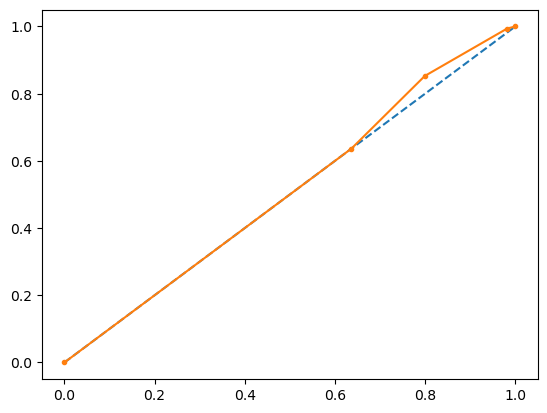

In [4]:
#KNN Algorithm
knn = KNeighborsClassifier(n_neighbors = 3)
#Training the model
trained_knn = knn.fit(X_train, y_train)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
print("Training Accuracy:")
print(acc_knn)
#Testing the model
acc_test_knn = round(knn.score(X_test, y_test) * 100, 2)
print("Testing Accuracy:")
print(acc_test_knn)
#Confusion Matrix
y_pred = knn.predict(X_test)
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, y_pred))
#Classification Matrix
print("Classification Matrix:")
print(metrics.classification_report(y_test, y_pred))
#cross validation 
cross_val = cross_val_score(KNeighborsClassifier(), X, y, scoring='accuracy', cv=10)
print("Cross Validation value:")
cross_val_knn = round(cross_val.mean()*100, 2)
print(cross_val_knn)
probs = trained_knn.predict_proba(X_test)
precision, recall, thresholds = precision_recall_curve(y_test.astype(float), probs[:, 1])
precision_KNN = np.mean(precision)
recall_KNN = np.mean(recall)
roc = roc_auc_score(y_test.astype(float), probs[:, 1])
print('AUC: %.3f' % roc)
fpr, tpr, thresholds = roc_curve(y_test.astype(float), probs[:, 1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
print("ROC curve:")
plt.show()

Training Accuracy:
73.94
Testing Accuracy:
72.8
Confusion Matrix:
[[   0  553]
 [   0 1480]]
Classification Matrix:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       553
           1       0.73      1.00      0.84      1480

    accuracy                           0.73      2033
   macro avg       0.36      0.50      0.42      2033
weighted avg       0.53      0.73      0.61      2033

Cross Validation value:
73.6
AUC: 0.491
ROC curve:


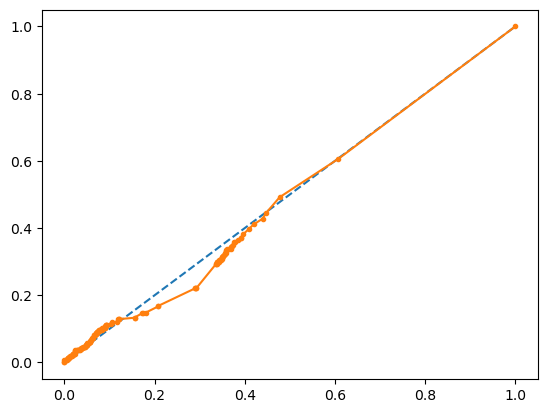

In [5]:
logistic_regression_model = LogisticRegression()
trained_logistic_regression_model = logistic_regression_model.fit(X_train, y_train)
train_LR_accuracy = round (trained_logistic_regression_model.score(X_train, y_train)*100, 2)
print ("Training Accuracy:")
print(train_LR_accuracy)
test_LR_accuracy = round (trained_logistic_regression_model.score(X_test, y_test)*100, 2)
print ("Testing Accuracy:")
print(test_LR_accuracy)
probability = logistic_regression_model.predict_proba(X_test)
predicted = logistic_regression_model.predict(X_test)
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, predicted))
print("Classification Matrix:")
print(metrics.classification_report(y_test, predicted))
cross_val = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print("Cross Validation value:")
cross_val_lr = round(cross_val.mean()*100, 2)
print(cross_val_lr)
probs = probability[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test.astype(float), probs)
precision_LR = np.mean(precision)
recall_LR = np.mean(recall)
roc = roc_auc_score(y_test.astype(float), probs)
print('AUC: %.3f' % roc)
fpr, tpr, thresholds = roc_curve(y_test.astype(float), probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
print("ROC curve:")
plt.show()


Training Accuracy:
75.9
Testing Accuracy:
76.34
Confusion Matrix:
[[  87  466]
 [  15 1465]]
Classification Matrix:
              precision    recall  f1-score   support

           0       0.85      0.16      0.27       553
           1       0.76      0.99      0.86      1480

    accuracy                           0.76      2033
   macro avg       0.81      0.57      0.56      2033
weighted avg       0.78      0.76      0.70      2033

Cross Validation value:
73.33
AUC: 0.684
ROC curve:


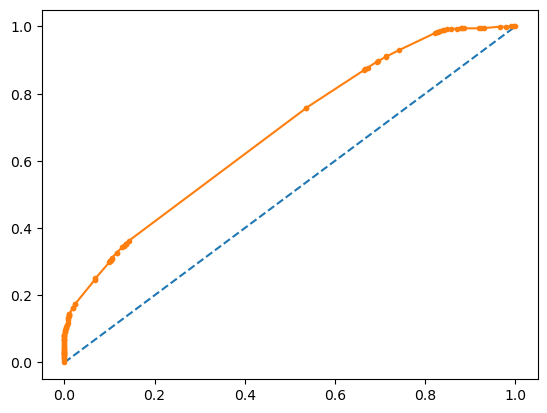

In [6]:
random_forest_model = RandomForestClassifier(n_estimators=600)
trained_random_forest_model = random_forest_model.fit(X_train, y_train)
train_RF_accuracy = round (trained_random_forest_model.score(X_train, y_train)*100, 2)
print ("Training Accuracy:")
print(train_RF_accuracy)
test_random_forest_model = random_forest_model.fit(X_test, y_test)
test_RF_accuracy = round (test_random_forest_model.score(X_test, y_test)*100, 2)
predicted = random_forest_model.predict(X_test)
print ("Testing Accuracy:")
print(test_RF_accuracy)
probability = random_forest_model.predict_proba(X_test)
predicted = random_forest_model.predict(X_test)
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, predicted))
print("Classification Matrix:")
print(metrics.classification_report(y_test, predicted))
cross_val = cross_val_score(RandomForestClassifier(), X, y, scoring='accuracy', cv=10)
print("Cross Validation value:")
cross_val_rf = round(cross_val.mean()*100, 2)
print(cross_val_rf)
probs = probability[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test.astype(float), probs)
precision_RF = np.mean(precision)
recall_RF = np.mean(recall)
roc = roc_auc_score(y_test.astype(float), probs)
print('AUC: %.3f' % roc)
fpr, tpr, thresholds = roc_curve(y_test.astype(float), probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
print("ROC curve:")
plt.show()

In [7]:
algorithm = ['K-nearest neighbor', 'Logistic Regression', 'Random Forest']
trainaccuracy = [acc_knn, train_LR_accuracy, train_RF_accuracy]
testaccuracy = [acc_test_knn, test_LR_accuracy, test_RF_accuracy]
index = np.arange(len(algorithm))

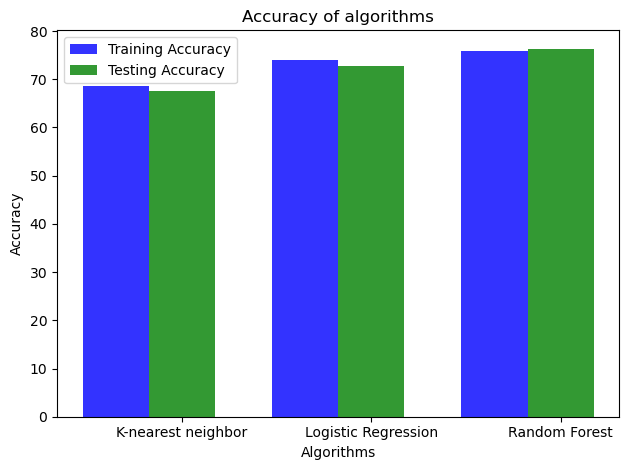

In [8]:
fig, ax = plt.subplots()
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, trainaccuracy, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Training Accuracy')

rects2 = plt.bar(index + bar_width, testaccuracy, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Testing Accuracy')

plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Accuracy of algorithms')
plt.xticks(index + bar_width, algorithm)
plt.legend()
plt.tight_layout()
plt.show()

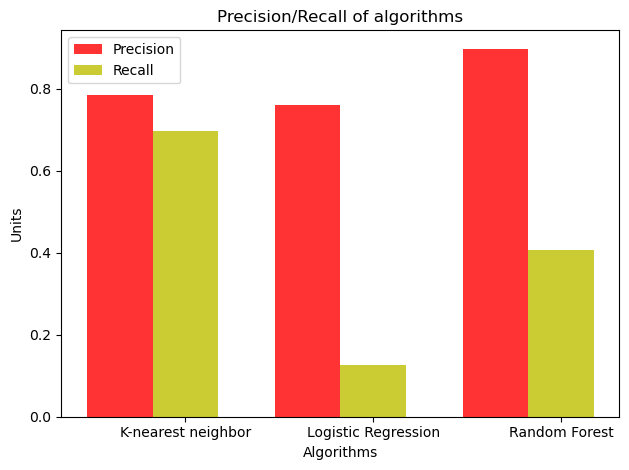

In [9]:
algorithm = ['K-nearest neighbor', 'Logistic Regression', 'Random Forest']
precision = [precision_KNN, precision_LR, precision_RF]
recall = [recall_KNN, recall_LR, recall_RF]
index = np.arange(len(algorithm))

fig, ax = plt.subplots()
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, precision, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Precision')

rects2 = plt.bar(index + bar_width, recall, bar_width,
                 alpha=opacity,
                 color='y',
                 label='Recall')

plt.xlabel('Algorithms')
plt.ylabel('Units')
plt.title('Precision/Recall of algorithms')
plt.xticks(index + bar_width, algorithm)
plt.legend()
plt.tight_layout()
plt.show()

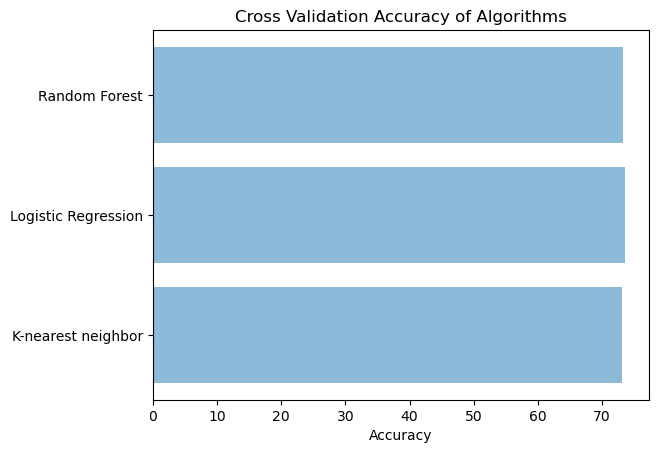

In [10]:
crossvalidationaccuracy = [cross_val_knn, cross_val_lr, cross_val_rf]
y_pos = np.arange(len(algorithm))

plt.barh(y_pos, crossvalidationaccuracy, align='center', alpha=0.5)
plt.yticks(y_pos, algorithm)
plt.xlabel('Accuracy')
plt.title('Cross Validation Accuracy of Algorithms')

plt.show()

In [11]:
# Summarize the 'Depressed' column
depressed_counts = df['Depressed'].value_counts()
depressed_percentages = df['Depressed'].value_counts(normalize=True) * 100

# Display the counts and percentages
print("Counts of Depressed and Not Depressed:")
print(depressed_counts)
print("\nPercentages of Depressed and Not Depressed:")
print(depressed_percentages)


Counts of Depressed and Not Depressed:
Depressed
1    4987
0    1789
Name: count, dtype: int64

Percentages of Depressed and Not Depressed:
Depressed
1    73.597993
0    26.402007
Name: proportion, dtype: float64


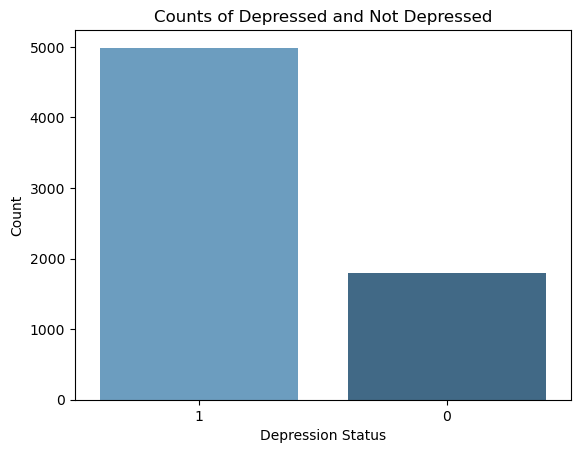

In [12]:
sns.barplot(x=depressed_counts.index, y=depressed_counts.values, palette="Blues_d")
#1 is not drepessed and 0 is depressed
plt.xlabel('Depression Status')
plt.ylabel('Count')
plt.title('Counts of Depressed and Not Depressed')
plt.show()

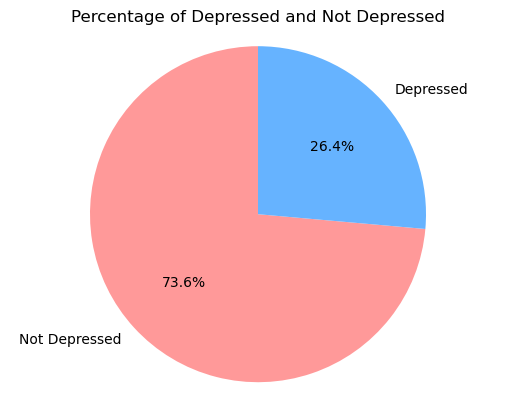

In [13]:
labels = ['Not Depressed', 'Depressed']
colors = ['#ff9999','#66b3ff']
plt.pie(depressed_percentages, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Depressed and Not Depressed')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [14]:
# Separate the data into two datasets: one for not depressed people and one for depressed people
not_depressed_df = df[df['Depressed'] == '1']
depressed_df = df[df['Depressed'] == '0']

# Save these datasets to CSV files
not_depressed_df.to_csv('not_depressed.csv', index=False)
depressed_df.to_csv('depressed.csv', index=False)

# Print the first few rows of each dataset to confirm
print("Not Depressed Dataset:")
print(not_depressed_df.head())

print("\nDepressed Dataset:")
print(depressed_df.head())


Not Depressed Dataset:
             fullname                                               html  \
0            KaylaG ✨  <p class="TweetTextSize js-tweet-text tweet-te...   
1         Ⓐ. ⓜⒾⒸⒽⒺⓁⓁⒺ  <p class="TweetTextSize js-tweet-text tweet-te...   
2                 R 💨  <p class="TweetTextSize js-tweet-text tweet-te...   
3                 2 ☆  <p class="TweetTextSize js-tweet-text tweet-te...   
4  ciana rose conklin  <p class="TweetTextSize js-tweet-text tweet-te...   

                    id  likes  replies  retweets  \
0  1062132914278854666      2        0         0   
1  1062132894553071618      1        0         0   
2  1062132890421657604      0        0         0   
3  1062132889406636032      0        1         0   
4  1062132887963746305      1        0         0   

                                                text            timestamp  \
0  Seasonal depression is seriously about to KICK...  2018-11-12T23:59:54   
1  He used her depression against her.... #ChadLo... 